<a href="https://colab.research.google.com/github/meghutch/Breast-Cancer-Classification-Clinical-Genomic/blob/master/Gene_Expression_Analysis_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Clinical Outcomes of Breast Cancer Patients - Gene Expression Data**

## **Principal Component Analysis**

**Author:** Meg Hutch

**Date:** November 19, 2019

**Objective:** Apply Principal Component Analysis to Determine Which Genes to Include into our Neural Network 

****Update: I previously did some testing and these methods don't seem to be causing significant differences. I will probably just need to later validate whether the PC change using the different methods, but for now, I think I can go ahead, clean up the code****

**References**

* https://www.youtube.com/watch?v=Lsue2gEM9D0&list=PLblh5JKOoLUIcdlgu78MnlATeyx4cEVeR&index=54&t=0s

* https://www.youtube.com/watch?v=FgakZw6K1QQ

* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

* https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python 

* https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [67]:
# Connect Colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import Data
gene_data = pd.read_csv('/content/drive/My Drive/Projects/Breast_Cancer_Classification/Data/merged_expression.txt', sep=',')

In [0]:
#gene_data.head()
#genes.info()

# **Data Pre-Processing**

**Check if NAs**

In [70]:
gene_data.isna().any()

Unnamed: 0    False
EVENT          True
OS_MONTHS     False
FIVE_YEAR      True
RERE          False
              ...  
CC2D1A        False
CB986545      False
IGSF9         False
DA110839      False
FAM71A         True
Length: 24372, dtype: bool

**Remove cases where there are missing values**

In [0]:
gene_data = gene_data.dropna()

**Check number of patients after removing Nas**

In [72]:
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 1903
Columns: 24372 entries, Unnamed: 0 to FAM71A
dtypes: float64(24371), object(1)
memory usage: 324.9+ MB


**Create a dataset just containing gene expression**

In [0]:
# remove event, os_motnhs, and Five_Year from the dataset
genes = gene_data.drop(columns=["Unnamed: 0", "EVENT", "OS_MONTHS", "FIVE_YEAR"])

In [74]:
genes

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,AK055082,BU687559,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CR749394,CD164,DB337918,MOBKL2A,HGC6.1.1,OR1J2,GNG5,TAF15,EXTL3,CNPY3,C19orf24,GAS2L2,AA913006,C21orf33,DA442494,P2RX1,CD515666,LRR1,ATP1B2,...,INPP5F,CR987215,ZNF683,MFAP1,DB299844,TMEM168,AI281566,DKFZp434A149,STUB1,CA841087,ELANE,SHISA2,BCAT1,BU738502,NCKAP1L,TMEM146,AK098705,PSMC3IP,TEAD1,LOC253724,BM725158,GRHPR,RAB4B-EGLN2,TBC1D4,ANGPTL2,AF086457,AK124197,ENOX1,LOC283104,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
0,9.738092,6.469688,5.457135,5.106495,5.652674,11.558869,8.340484,5.384699,5.648494,5.336235,5.468668,7.070649,5.477154,5.489805,5.318898,6.811309,5.440853,5.361170,5.823306,8.809831,6.790593,5.595347,6.141047,5.481023,6.499117,5.669507,5.469022,8.091453,10.390643,6.873466,7.277366,7.345938,5.505809,5.310169,8.400664,5.203607,5.715186,5.379147,7.383439,6.621313,...,6.377142,5.303800,5.713196,7.935464,5.546904,6.670937,5.293034,5.234425,9.008786,5.506204,5.795287,6.155340,6.285499,5.236572,6.547422,5.353135,5.198876,5.901473,5.610397,5.515762,5.213511,8.139151,10.232505,7.311327,9.677952,5.318426,5.635153,5.918239,5.295203,5.474224,5.329883,5.745324,7.021679,8.010657,5.299815,6.235804,5.349555,5.947404,5.615147,5.133576
1,9.013876,5.748717,5.699735,5.419119,5.611212,6.199492,8.341091,5.490558,5.789506,5.700974,5.495295,6.098949,5.589824,5.055598,5.489397,6.952007,5.545206,5.579463,6.341935,9.307305,6.132436,5.328097,6.400910,5.531249,7.178274,5.697691,5.434639,8.571327,9.248432,6.969206,7.018170,7.745871,5.594083,5.393268,7.392408,5.193783,5.692306,5.373723,7.668169,6.158274,...,5.933548,5.544296,5.674520,7.631344,5.334231,6.875814,5.574961,5.458476,9.385045,5.302117,5.521299,9.409817,6.094350,5.473346,5.683700,4.888335,5.615278,6.447777,5.950548,5.502117,5.124030,8.261487,10.186566,6.324112,8.895600,5.345262,6.281727,5.515844,5.442257,5.303871,5.384794,5.285060,7.612797,7.988643,5.194247,6.328059,5.469445,6.938685,5.231857,5.604560
2,7.963493,5.553056,5.472386,5.265556,5.793398,6.489781,8.862815,5.538854,5.566713,7.233671,5.537530,6.964546,5.255454,5.374815,5.668776,6.480061,5.790445,5.462634,5.807004,8.477327,5.572601,5.539776,8.575001,5.562090,6.469047,5.329956,5.575368,8.016276,9.073888,6.592135,7.276074,7.271721,5.603928,5.423146,7.813142,5.410971,5.530826,5.453638,8.878045,6.032880,...,6.118529,5.299978,5.426043,7.983667,5.435909,7.033896,5.442052,5.195063,8.866750,5.254445,4.946585,9.094121,7.387453,5.282649,6.217209,5.313808,5.508167,6.076896,5.747801,5.368297,5.371385,7.731911,9.954702,7.222594,8.972083,5.420388,5.404494,5.350242,5.368716,5.370394,5.336455,5.452393,6.619220,8.044471,5.306294,6.306927,5.362207,7.397672,5.372138,5.645597
3,8.177157,5.391160,5.529795,5.011812,5.807604,5.319779,8.693784,5.430685,5.539252,6.124384,6.657355,6.409554,5.289307,5.299305,5.112324,5.987913,5.393475,5.282728,5.985588,8.101386,5.808433,5.345124,9.164529,5.336013,6.487679,5.343103,5.638589,8.323978,9.937245,6.181493,7.240568,7.418395,5.567413,5.318361,7.976523,5.167832,5.589245,5.324133,8.351372,6.479420,...,6.119852,5.347819,6.455400,8.059080,5.249822,6.151727,5.422433,5.309452,8.559879,5.446548,5.041230,10.039994,7.731911,5.319933,6.033998,5.228991,5.324400,5.650472,5.579526,5.303998,5.351482,8.301195,10.088769,7.053031,8.664307,5.370416,5.480761,5.650978,5.295628,5.694697,5.663304,5.529928,6.966482,7.527300,5.197607,6.515638,5.309927,6.175716,5.586521,5.354582
4,8.050127,5.530582,5.303667,5.149618,5.934570,8.787583,8.055626,5.239388,5.646685,7.155642,5.878104,5.798117,5.297733,5.610297,5.141883,6.675580,6.598310,5.328773,6.200995,9.301414,6.182025,5.384272,5.904271,5.457066,6.426740,5.402129,5.486989,8.068202,9.619406,6.609742,7.583667,7.238596,5.562333,5.324074,8.518062,5.278818,5.751317,5.476494,8.033283,6.247299,...,6.129334,5.197787,5.834628,8.168316,5.462563,6.692691,5.434657,5.399642,9.330700,5.312195,5.310646,5.929184,6.289241,5.333330

# **Principal Component Analysis**

**What is a Pricipal Component? (From DataCamp)**

Principal componenets have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has the most variance and the magnitude signifies the amount of varaince that Principal Component captures of the data when projected onto that axis. 

The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent prinicpal component is orthogonal to the last and has a lesser variance .

Correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated prinicpal components; each representing a different set of correlated features with differents of variation.

Each principal component represents a percentage of total variation captured from the data

****Note:** I troubleshooted some discrepancies among the references above in regards to fit and fit transform. Some articles would initially use fit_transform to scale and then again used pca.fit_transform when identifying prinicipal components, other references, instead of fit_transform just used pca.transform for this step. I tested both methods and got the same results. Actually looks like maybe using fit_transform is probably just combining these steps?****** 


**1) Standardize the Data**

Must scale features in your data before applying PCA. **StandardScaler** helps standardize features onto unit scale (mean = 0 and standard deviation = 1). Thus, each value in the dataset will have the sample mean value subtracted and then divided by the standard deviation of the whole dataset. 


In [0]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

# Stanardize/Scale the data
x = StandardScaler().fit_transform(genes)

**Let's check whether the normalized data has a mean of zero and a standard deviation of 1**

In [76]:
np.mean(x), np.std(x)

(4.1760406566772064e-19, 0.9999999999999999)

Convert the normalized features into tabular format 

In [0]:
# Create list of column names
features = list(genes.columns.values) 

# Create data frame of newly normalized data
x = pd.DataFrame(x, columns = features)

**2) Determine Prinicpal Components**

In [0]:
# Define pca function
pca = PCA()

# Fit to the scaled/standardized data
principalComponents = pca.fit_transform(x)

# Create  a dataframe of the components
principalDf = pd.DataFrame(data = principalComponents)

In [79]:
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746
0,-46.927916,4.739976,-55.999332,32.035664,19.910327,22.467124,-9.464583,27.687378,40.899387,17.413664,12.874125,23.709718,-15.148509,-0.865481,9.578451,43.509412,8.147583,-0.626041,17.645039,-1.618802,9.019847,4.457706,4.518250,-4.937904,-24.213609,8.105994,13.850133,1.111403,6.630694,-3.497717,7.405129,-6.764970,6.955681,-2.208536,20.362868,1.950536,4.004424,-5.765875,14.492081,-1.443265,...,2.353436,1.680148,0.502169,1.247080,-0.962811,0.385817,0.871507,-2.201203,0.761591,-3.156483,0.331051,-0.703946,-0.146786,-1.998286,-1.131290,0.189897,-0.511533,1.900914,-0.181689,-1.004616,1.497246,-1.563271,-0.864876,0.249439,-0.870708,1.401435,0.314823,-0.070911,-7.889290,-2.685330,-2.326405,-1.369807,0.192507,1.453147,1.454840,-0.439513,0.493475,0.105313,-0.492231,6.766752e-15
1,-11.099104,-33.901894,15.785114,-4.082658,-4.467048,13.386620,-3.602027,-9.460577,13.669762,-10.658357,5.732476,-4.388901,-30.802218,-11.101859,-9.150638,-18.567117,4.756882,7.048982,-40.085906,10.763511,8.341258,0.161962,6.882540,4.774633,3.674660,9.483629,2.278378,16.801364,-6.104713,-5.760067,5.589340,0.146233,-19.578341,-1.117433,2.159414,-0.804954,8.215614,-14.119656,-1.601074,-26.671501,...,1.031880,0.345586,1.139115,-0.060822,-0.698941,0.342868,-0.296810,2.326502,-1.250184,0.580932,2.046352,2.343894,1.483325,-1.265529,-1.346815,1.698744,-0.596339,-1.134852,-0.511363,0.428665,-1.396380,0.736282,-0.818182,-0.522198,-1.246614,1.264074,0.691885,0.935606,-0.700082,0.167398,0.929812,2.266908,0.196243,-2.585104,-2.485255,-0.162657,0.026969,-1.019625,0.011169,6.766752e-15
2,-96.985059,-24.940906,28.624658,36.686919,-30.138800,11.416279,14.569905,-46.678033,-3.364675,3.969207,0.891319,-13.955752,12.792117,19.411776,18.536698,9.425662,13.734446,1.497408,-8.534976,18.240748,9.333484,-5.292072,0.957113,10.117796,10.855034,4.348019,2.285662,12.438302,-6.132481,-1.554175,9.490339,-12.595310,-9.525302,-6.433478,-13.658776,7.712239,3.752626,-8.410007,-1.828502,-18.692607,...,-2.796961,1.651215,-0.477119,-1.005758,2.323221,0.415255,-3.008175,1.303572,-0.327661,-0.465163,1.156033,-0.249526,-0.075100,0.570273,1.683425,-1.339252,-0.484451,0.768586,-1.752514,-3.467120,-1.126820,2.211725,-0.453516,-0.351369,-2.548713,0.297190,0.268970,-0.537406,-2.513105,0.018479,-0.518864,2.770224,0.587882,1.428211,-0.893350,0.402909,1.015733,-0.716538,-0.715863,6.766752e-15
3,-88.693561,-21.679808,45.812435,70.598700,-13.705619,2.806051,27.613431,-30.230731,2.462651,-26.603622,5.833794,10.598025,10.449427,30.320269,-3.339759,14.762800,20.286133,-1.838540,-4.101172,4.090638,1.929492,-3.241216,3.179941,13.207027,11.827730,5.234861,-16.755167,-5.536135,-22.167629,-9.748619,-7.178764,-8.118227,3.053096,-1.646036,-15.281099,19.653000,-3.006496,1.973012,6.478390,-6.277557,...,-1.759754,1.256679,-1.186898,-1.400255,-1.278223,1.773344,2.980416,2.031024,-1.345807,1.568314,2.124790,0.769984,-2.138613,-1.137067,0.261142,1.456147,-0.560683,0.649826,2.319222,-1.087604,-0.443428,1.103082,1.345145,1.467444,-0.067380,-2.280579,-0.515177,0.072687,-0.218214,0.898826,-0.999214,0.145761,-0.827297,1.166937,2.049148,-0.033257,0.560175,-0.165480,0.701716,6.766752e-15
4,-24.570044,-9.740202,23.784122,-29.528877,1.612231,-18.002656,5.038487,-7.691579,-0.683039,-23.345566,1.453569,-7.170600,-28.134315,12.000964,13.397635,21.759322,2.404912,8.328937,3.120519,-17.019949,-3.717521,4.008203,2.587010,8.357872,2.857080,8.202083,4.414469,25.864795,-13.155909,0.037880,-19.590891,-2.808960,7.117514,-10.624943,5.979798,-0.229612,-7.414543,3.089610,-3.394074,0.996638,...,0.916209,-0.151153,-0.523049,-1.163171,-0.028485,1.712148,-0.156898,0.274584,1.536872,-0.627686,-0.172421,-1.013460,-0.406305,0.572637,1.004417,-0.

In [80]:
# Generate a list of column names with the number for each prinicpal component 
col_names = [f'pc{i}' for i in range(1, 1748)] # there are 1747 samples - so we want to have range of 1 less than 1748 column names 

# Add column names to the principal component dataset 
principalDf = pd.DataFrame(principalComponents, columns = col_names)
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,...,pc1708,pc1709,pc1710,pc1711,pc1712,pc1713,pc1714,pc1715,pc1716,pc1717,pc1718,pc1719,pc1720,pc1721,pc1722,pc1723,pc1724,pc1725,pc1726,pc1727,pc1728,pc1729,pc1730,pc1731,pc1732,pc1733,pc1734,pc1735,pc1736,pc1737,pc1738,pc1739,pc1740,pc1741,pc1742,pc1743,pc1744,pc1745,pc1746,pc1747
0,-46.927916,4.739976,-55.999332,32.035664,19.910327,22.467124,-9.464583,27.687378,40.899387,17.413664,12.874125,23.709718,-15.148509,-0.865481,9.578451,43.509412,8.147583,-0.626041,17.645039,-1.618802,9.019847,4.457706,4.518250,-4.937904,-24.213609,8.105994,13.850133,1.111403,6.630694,-3.497717,7.405129,-6.764970,6.955681,-2.208536,20.362868,1.950536,4.004424,-5.765875,14.492081,-1.443265,...,2.353436,1.680148,0.502169,1.247080,-0.962811,0.385817,0.871507,-2.201203,0.761591,-3.156483,0.331051,-0.703946,-0.146786,-1.998286,-1.131290,0.189897,-0.511533,1.900914,-0.181689,-1.004616,1.497246,-1.563271,-0.864876,0.249439,-0.870708,1.401435,0.314823,-0.070911,-7.889290,-2.685330,-2.326405,-1.369807,0.192507,1.453147,1.454840,-0.439513,0.493475,0.105313,-0.492231,6.766752e-15
1,-11.099104,-33.901894,15.785114,-4.082658,-4.467048,13.386620,-3.602027,-9.460577,13.669762,-10.658357,5.732476,-4.388901,-30.802218,-11.101859,-9.150638,-18.567117,4.756882,7.048982,-40.085906,10.763511,8.341258,0.161962,6.882540,4.774633,3.674660,9.483629,2.278378,16.801364,-6.104713,-5.760067,5.589340,0.146233,-19.578341,-1.117433,2.159414,-0.804954,8.215614,-14.119656,-1.601074,-26.671501,...,1.031880,0.345586,1.139115,-0.060822,-0.698941,0.342868,-0.296810,2.326502,-1.250184,0.580932,2.046352,2.343894,1.483325,-1.265529,-1.346815,1.698744,-0.596339,-1.134852,-0.511363,0.428665,-1.396380,0.736282,-0.818182,-0.522198,-1.246614,1.264074,0.691885,0.935606,-0.700082,0.167398,0.929812,2.266908,0.196243,-2.585104,-2.485255,-0.162657,0.026969,-1.019625,0.011169,6.766752e-15
2,-96.985059,-24.940906,28.624658,36.686919,-30.138800,11.416279,14.569905,-46.678033,-3.364675,3.969207,0.891319,-13.955752,12.792117,19.411776,18.536698,9.425662,13.734446,1.497408,-8.534976,18.240748,9.333484,-5.292072,0.957113,10.117796,10.855034,4.348019,2.285662,12.438302,-6.132481,-1.554175,9.490339,-12.595310,-9.525302,-6.433478,-13.658776,7.712239,3.752626,-8.410007,-1.828502,-18.692607,...,-2.796961,1.651215,-0.477119,-1.005758,2.323221,0.415255,-3.008175,1.303572,-0.327661,-0.465163,1.156033,-0.249526,-0.075100,0.570273,1.683425,-1.339252,-0.484451,0.768586,-1.752514,-3.467120,-1.126820,2.211725,-0.453516,-0.351369,-2.548713,0.297190,0.268970,-0.537406,-2.513105,0.018479,-0.518864,2.770224,0.587882,1.428211,-0.893350,0.402909,1.015733,-0.716538,-0.715863,6.766752e-15
3,-88.693561,-21.679808,45.812435,70.598700,-13.705619,2.806051,27.613431,-30.230731,2.462651,-26.603622,5.833794,10.598025,10.449427,30.320269,-3.339759,14.762800,20.286133,-1.838540,-4.101172,4.090638,1.929492,-3.241216,3.179941,13.207027,11.827730,5.234861,-16.755167,-5.536135,-22.167629,-9.748619,-7.178764,-8.118227,3.053096,-1.646036,-15.281099,19.653000,-3.006496,1.973012,6.478390,-6.277557,...,-1.759754,1.256679,-1.186898,-1.400255,-1.278223,1.773344,2.980416,2.031024,-1.345807,1.568314,2.124790,0.769984,-2.138613,-1.137067,0.261142,1.456147,-0.560683,0.649826,2.319222,-1.087604,-0.443428,1.103082,1.345145,1.467444,-0.067380,-2.280579,-0.515177,0.072687,-0.218214,0.898826,-0.999214,0.145761,-0.827297,1.166937,2.049148,-0.033257,0.560175,-0.165480,0.701716,6.766752e-15
4,-24.570044,-9.740202,23.784122,-29.528877,1.612231,-18.002656,5.038487,-7.691579,-0.683039,-23.345566,1.453569,-7.170600,-28.134315,12.000964,13.397635,21.759322,2.404912,8.328937,3.120519,-17.019949,-3.717521,4.008203,2.587010,8.357872,2.857080,8.202083,4.414469,25.864795,-13.155909,0.037880,-19.590891,-2.808960,7.117514,-10.624943,5.979798,-0.229612,-7.414543,3.089610,-3.394074

**3) Determine # of Components and Variance**

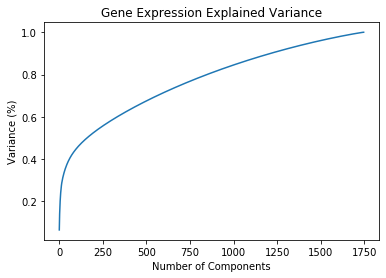

In [81]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Gene Expression Explained Variance')
plt.show()

The plot tells us that with ~1250 components we can capture 90% of the data. 

**Alternative method - pre-selecting % for variance**

**Fit PCA to the data**

In [0]:
pca = PCA(0.9)
x2 = pca.fit_transform(x)

In [83]:
x2 = pd.DataFrame(data = x2)
x2 #this is the 1213 columns 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212
0,-46.927916,4.739976,-55.999332,32.035664,19.910327,22.467124,-9.464583,27.687378,40.899387,17.413664,12.874125,23.709718,-15.148509,-0.865481,9.578451,43.509412,8.147583,-0.626041,17.645039,-1.618802,9.019847,4.457706,4.518250,-4.937904,-24.213609,8.105994,13.850133,1.111403,6.630694,-3.497717,7.405129,-6.764970,6.955681,-2.208536,20.362868,1.950536,4.004424,-5.765875,14.492081,-1.443265,...,-2.101781,-2.619248,-1.977300,-1.160055,3.093098,-1.726845,2.134831,-5.074219,1.264507,-0.534047,-2.347654,-1.377870,1.539588,0.161884,-0.101084,1.113985,-0.026914,1.364764,-0.345376,-3.886792,1.150454,6.223514,0.702818,1.637886,2.329647,2.357557,4.300836,2.558626,2.829845,1.323680,-0.458878,2.773576,1.802263,3.820567,-1.299738,-0.279921,4.578414,-1.168474,0.071375,-0.146568
1,-11.099104,-33.901894,15.785114,-4.082658,-4.467048,13.386620,-3.602027,-9.460577,13.669762,-10.658357,5.732476,-4.388901,-30.802218,-11.101859,-9.150638,-18.567117,4.756882,7.048982,-40.085906,10.763511,8.341258,0.161962,6.882540,4.774633,3.674660,9.483629,2.278378,16.801364,-6.104713,-5.760067,5.589340,0.146233,-19.578341,-1.117433,2.159414,-0.804954,8.215614,-14.119656,-1.601074,-26.671501,...,0.926336,-2.624240,-1.496002,-1.272868,2.112246,-0.789029,0.715453,0.890394,-1.403201,-0.615212,0.672030,-0.667122,-1.782319,-1.707076,0.113719,-3.016634,1.233890,1.035532,-0.872841,-0.747569,-0.669253,-3.052145,1.183874,0.031247,0.019263,1.334762,3.104708,0.079464,2.749804,-0.267723,-3.416557,0.170690,0.564219,1.365162,2.610298,-0.346169,1.085341,-0.233196,-2.224786,-0.303755
2,-96.985059,-24.940906,28.624658,36.686919,-30.138800,11.416279,14.569905,-46.678033,-3.364675,3.969207,0.891319,-13.955752,12.792117,19.411776,18.536698,9.425662,13.734446,1.497408,-8.534976,18.240748,9.333484,-5.292072,0.957113,10.117796,10.855034,4.348019,2.285662,12.438302,-6.132481,-1.554175,9.490339,-12.595310,-9.525302,-6.433478,-13.658776,7.712239,3.752626,-8.410007,-1.828502,-18.692607,...,0.682079,3.863686,6.020736,5.631814,-1.667982,3.095336,1.084845,0.661966,2.009684,-1.215473,-3.300853,-0.371373,0.931490,0.500596,-5.652596,-2.734779,-0.912263,-0.723721,3.601580,1.658013,-1.057857,-0.570181,1.211595,0.003861,-2.711111,-1.532550,0.968635,1.943298,-3.680609,-4.444033,0.650985,2.942097,0.164284,-4.767151,-0.253965,0.707805,0.964980,-1.406674,-0.903013,1.284447
3,-88.693561,-21.679808,45.812435,70.598700,-13.705619,2.806051,27.613431,-30.230731,2.462651,-26.603622,5.833794,10.598025,10.449427,30.320269,-3.339759,14.762800,20.286133,-1.838540,-4.101172,4.090638,1.929492,-3.241216,3.179941,13.207027,11.827730,5.234861,-16.755167,-5.536135,-22.167629,-9.748619,-7.178764,-8.118227,3.053096,-1.646036,-15.281099,19.653000,-3.006496,1.973012,6.478390,-6.277557,...,1.979427,-3.317619,0.032004,3.397356,3.740321,-3.238854,-0.370679,2.003887,-4.520116,1.646821,3.535017,1.551604,3.042315,0.951778,1.780712,4.605072,3.026325,0.949735,-4.000292,-0.540353,-0.969436,3.009434,-2.485801,1.286063,2.007402,-1.108053,1.146242,5.247346,4.241280,6.341164,3.586218,-0.673187,-2.770710,1.090580,-3.023241,-2.617489,-1.545182,-2.710888,-2.871721,3.878440
4,-24.570044,-9.740202,23.784122,-29.528877,1.612231,-18.002656,5.038487,-7.691579,-0.683039,-23.345566,1.453569,-7.170600,-28.134315,12.000964,13.397635,21.759322,2.404912,8.328937,3.120519,-17.019949,-3.717521,4.008203,2.587010,8.357872,2.857080,8.202083,4.414469,25.864795,-13.155909,0.037880,-19.590891,-2.808960,7.117514,-10.624943,5.979798,-0.229612,-7.414543,3.089610,-3.394074,0.996638,...,-0.659002,-1.242691,0.639394,1.661985,4.207314,0.209338,-4.130559,2.127446,1.870065,1.003931,1.763939,-3.580287,0.310933,0.335520,-2.475282,0.149770,0.826434,-3.650367,0

**Determine the exact number of n_components needed to capture 0.9 variance**

In [84]:
pca.n_components_

1213

This function indicates that 1213 is the number of principal componenets needed to capture 90% of the variation which is what I had estimated from the above plot.

**Scree Plot**

View which principal components contribute to the variance 

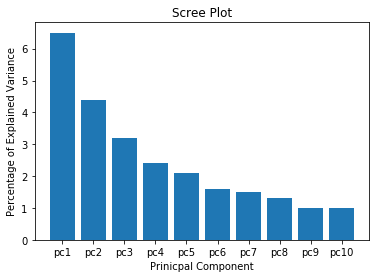

In [85]:
# remove PC from 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var = per_var[:10] #top 10 PC - this number is chosen just so that we can more easily view the plot
labels = col_names[:10]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Prinicpal Component')
plt.title('Scree Plot')
plt.show()

**Draw PCA Plot**

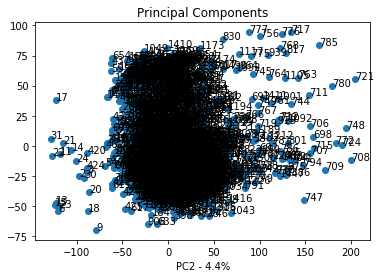

In [86]:
plt.scatter(principalDf.pc1, principalDf.pc2)
plt.title('Principal Components')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.xlabel('PC2 - {0}%'.format(per_var[1]))

# The labeled numbers are the indiviudal patients samples
for sample in principalDf.index:
  plt.annotate(sample, (principalDf.pc1.loc[sample], principalDf.pc2.loc[sample]))

**Determine Relevant Genes**

Get the name of the top 10 genes that contribute most to pc1

In [87]:
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=features)

## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

SEPT15     -0.021499
GLRX3      -0.020961
ATP5F1     -0.020938
CD237904    0.020542
AX747098    0.020521
MMADHC     -0.020515
DQ896551   -0.020388
PSMC1      -0.020304
MORF4L1    -0.020216
SDHD       -0.020105
dtype: float64


**Select the Top 1213 Prinicipal Components that Explain 90 % of the Variance**

In [0]:
principalDf = principalDf.iloc[:,0:1213]

In [89]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,...,pc1174,pc1175,pc1176,pc1177,pc1178,pc1179,pc1180,pc1181,pc1182,pc1183,pc1184,pc1185,pc1186,pc1187,pc1188,pc1189,pc1190,pc1191,pc1192,pc1193,pc1194,pc1195,pc1196,pc1197,pc1198,pc1199,pc1200,pc1201,pc1202,pc1203,pc1204,pc1205,pc1206,pc1207,pc1208,pc1209,pc1210,pc1211,pc1212,pc1213
0,-46.927916,4.739976,-55.999332,32.035664,19.910327,22.467124,-9.464583,27.687378,40.899387,17.413664,12.874125,23.709718,-15.148509,-0.865481,9.578451,43.509412,8.147583,-0.626041,17.645039,-1.618802,9.019847,4.457706,4.518250,-4.937904,-24.213609,8.105994,13.850133,1.111403,6.630694,-3.497717,7.405129,-6.764970,6.955681,-2.208536,20.362868,1.950536,4.004424,-5.765875,14.492081,-1.443265,...,-2.101781,-2.619248,-1.977300,-1.160055,3.093098,-1.726845,2.134831,-5.074219,1.264507,-0.534047,-2.347654,-1.377870,1.539588,0.161884,-0.101084,1.113985,-0.026914,1.364764,-0.345376,-3.886792,1.150454,6.223514,0.702818,1.637886,2.329647,2.357557,4.300836,2.558626,2.829845,1.323680,-0.458878,2.773576,1.802263,3.820567,-1.299738,-0.279921,4.578414,-1.168474,0.071375,-0.146568
1,-11.099104,-33.901894,15.785114,-4.082658,-4.467048,13.386620,-3.602027,-9.460577,13.669762,-10.658357,5.732476,-4.388901,-30.802218,-11.101859,-9.150638,-18.567117,4.756882,7.048982,-40.085906,10.763511,8.341258,0.161962,6.882540,4.774633,3.674660,9.483629,2.278378,16.801364,-6.104713,-5.760067,5.589340,0.146233,-19.578341,-1.117433,2.159414,-0.804954,8.215614,-14.119656,-1.601074,-26.671501,...,0.926336,-2.624240,-1.496002,-1.272868,2.112246,-0.789029,0.715453,0.890394,-1.403201,-0.615212,0.672030,-0.667122,-1.782319,-1.707076,0.113719,-3.016634,1.233890,1.035532,-0.872841,-0.747569,-0.669253,-3.052145,1.183874,0.031247,0.019263,1.334762,3.104708,0.079464,2.749804,-0.267723,-3.416557,0.170690,0.564219,1.365162,2.610298,-0.346169,1.085341,-0.233196,-2.224786,-0.303755
2,-96.985059,-24.940906,28.624658,36.686919,-30.138800,11.416279,14.569905,-46.678033,-3.364675,3.969207,0.891319,-13.955752,12.792117,19.411776,18.536698,9.425662,13.734446,1.497408,-8.534976,18.240748,9.333484,-5.292072,0.957113,10.117796,10.855034,4.348019,2.285662,12.438302,-6.132481,-1.554175,9.490339,-12.595310,-9.525302,-6.433478,-13.658776,7.712239,3.752626,-8.410007,-1.828502,-18.692607,...,0.682079,3.863686,6.020736,5.631814,-1.667982,3.095336,1.084845,0.661966,2.009684,-1.215473,-3.300853,-0.371373,0.931490,0.500596,-5.652596,-2.734779,-0.912263,-0.723721,3.601580,1.658013,-1.057857,-0.570181,1.211595,0.003861,-2.711111,-1.532550,0.968635,1.943298,-3.680609,-4.444033,0.650985,2.942097,0.164284,-4.767151,-0.253965,0.707805,0.964980,-1.406674,-0.903013,1.284447
3,-88.693561,-21.679808,45.812435,70.598700,-13.705619,2.806051,27.613431,-30.230731,2.462651,-26.603622,5.833794,10.598025,10.449427,30.320269,-3.339759,14.762800,20.286133,-1.838540,-4.101172,4.090638,1.929492,-3.241216,3.179941,13.207027,11.827730,5.234861,-16.755167,-5.536135,-22.167629,-9.748619,-7.178764,-8.118227,3.053096,-1.646036,-15.281099,19.653000,-3.006496,1.973012,6.478390,-6.277557,...,1.979427,-3.317619,0.032004,3.397356,3.740321,-3.238854,-0.370679,2.003887,-4.520116,1.646821,3.535017,1.551604,3.042315,0.951778,1.780712,4.605072,3.026325,0.949735,-4.000292,-0.540353,-0.969436,3.009434,-2.485801,1.286063,2.007402,-1.108053,1.146242,5.247346,4.241280,6.341164,3.586218,-0.673187,-2.770710,1.090580,-3.023241,-2.617489,-1.545182,-2.710888,-2.871721,3.878440
4,-24.570044,-9.740202,23.784122,-29.528877,1.612231,-18.002656,5.038487,-7.691579,-0.683039,-23.345566,1.453569,-7.170600,-28.134315,12.000964,13.397635,21.759322,2.404912,8.328937,3.120519,-17.019949,-3.717521,4.008203,2.587010,8.357872,2.857080,8.202083,4.414469,25.864795,-13.155909,0.037880,-19.590891,-2.808960,7.117514,-10.624943,5.979798,-0.229612,-7.414543,3.089610,-3.394074,0.996638,...,-0.65900

**Save the selected PCA Components**

In [0]:
principalDf.to_csv('/content/drive/My Drive/Projects/Breast_Cancer_Classification/Processed_Data/gene_pca_components_90.txt')